In [70]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import json
from PIL import Image
import matplotlib.pyplot as plt

In [71]:
%matplotlib inline

In [72]:
directory = "C://Users//subash//Desktop//json_dumps"

In [73]:
dict_tweets={}
def tweets_create(tweets):
    for tweet in tweets["statuses"]:
        if tweet["id"] not in dict_tweets:
            dict_tweets[tweet["id"]] = tweet["text"]

In [74]:
files = os.listdir(directory)

In [75]:
for file in files:
    if ".json" in file:
        file = directory + "//" + file
        with open(file,"r") as f:
            tweets = json.load(f)
        tweets_create(tweets)

In [76]:
df = pd.DataFrame.from_dict(dict_tweets, orient="index")

In [77]:
df = df.reset_index()

In [78]:
df.head()

,index,0
0,1127525852953051136,Good morning and Happy Mother’s Day to all the...
1,1127259066282196992,Every day is MOTHERSDAY ❤️ Big LOVE to all the...
2,1127476948223922176,Happy Mother’s Day to our amazing PBB moms — T...
3,1127569105203159045,RT @Time4U2Know: @VincentCrypt46 A beautiful d...
4,1127569103261138944,"To all the amazing moms out there, Happy Mothe..."


In [79]:
df.columns = ["id","text"]

In [80]:
df.head()

,id,text
0,1127525852953051136,Good morning and Happy Mother’s Day to all the...
1,1127259066282196992,Every day is MOTHERSDAY ❤️ Big LOVE to all the...
2,1127476948223922176,Happy Mother’s Day to our amazing PBB moms — T...
3,1127569105203159045,RT @Time4U2Know: @VincentCrypt46 A beautiful d...
4,1127569103261138944,"To all the amazing moms out there, Happy Mothe..."


In [81]:
df["text_len"] = df.text.apply(lambda x: len(x))

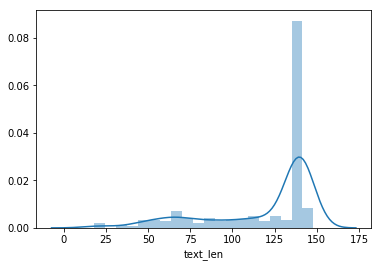

In [82]:
sns.distplot(df["text_len"],bins=20)

In [83]:
import preprocessing as pp

In [84]:
p_df = pp.preprocess(df,col_name="text")

In [85]:
from wordcloud import WordCloud

In [86]:
alice_mask = np.array(Image.open("alice.png"))

In [87]:
#BagOfWords
dict_words = {}
def calc_word_freq(text):
    words = text.split()
    for word in words:
        if word not in dict_words:
            dict_words[word] = 1
        else:
            dict_words[word] = dict_words.get(word) + 1

In [100]:
wc = WordCloud(background_color="white", max_words=80,mask=alice_mask, contour_width=3, contour_color='steelblue')

In [101]:
df.text.apply(lambda x: calc_word_freq(x))

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
469    None
470    None
471    None
472    None
473    None
474    None
475    None
476    None
477    None
478    None
479    None
480    None
481    None
482    None
483    None
484    None
485    None
486    None
487    None
488    None
489    None
490    None
491    None
492    None
493    None
494    None
495    None
496    None
497    None
498    None
Name: text, Length: 499, dtype: object

In [102]:
from collections import OrderedDict

In [103]:
dict_desc = OrderedDict(sorted(dict_words.items(), reverse=True,key=lambda x: x[1]))

In [104]:
dict_desc.pop("a")
dict_desc.pop("f")
dict_desc.pop("im")
dict_desc.pop("amp")

60

In [105]:
wc.generate_from_frequencies(dict_desc)

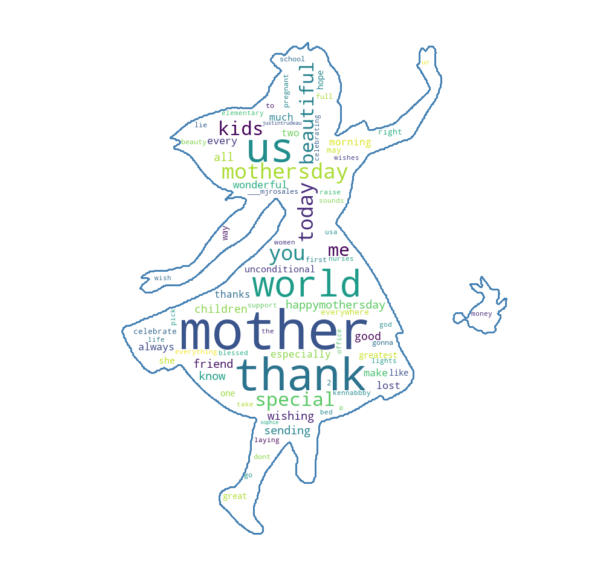

In [107]:
# show
plt.figure(figsize=(30,10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.savefig("motherday.png")